# CNN in TensorFlow & Keras

# Importing libraries & Loading the CIFAR-10 Dataset:

In [4]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [5]:
SEED_VALUE = 42
 
# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
 
print(X_train.shape)
print(X_test.shape)

170498071/170498071 [==============================] - 92s 1us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


# Display Sample Images from the Dataset:

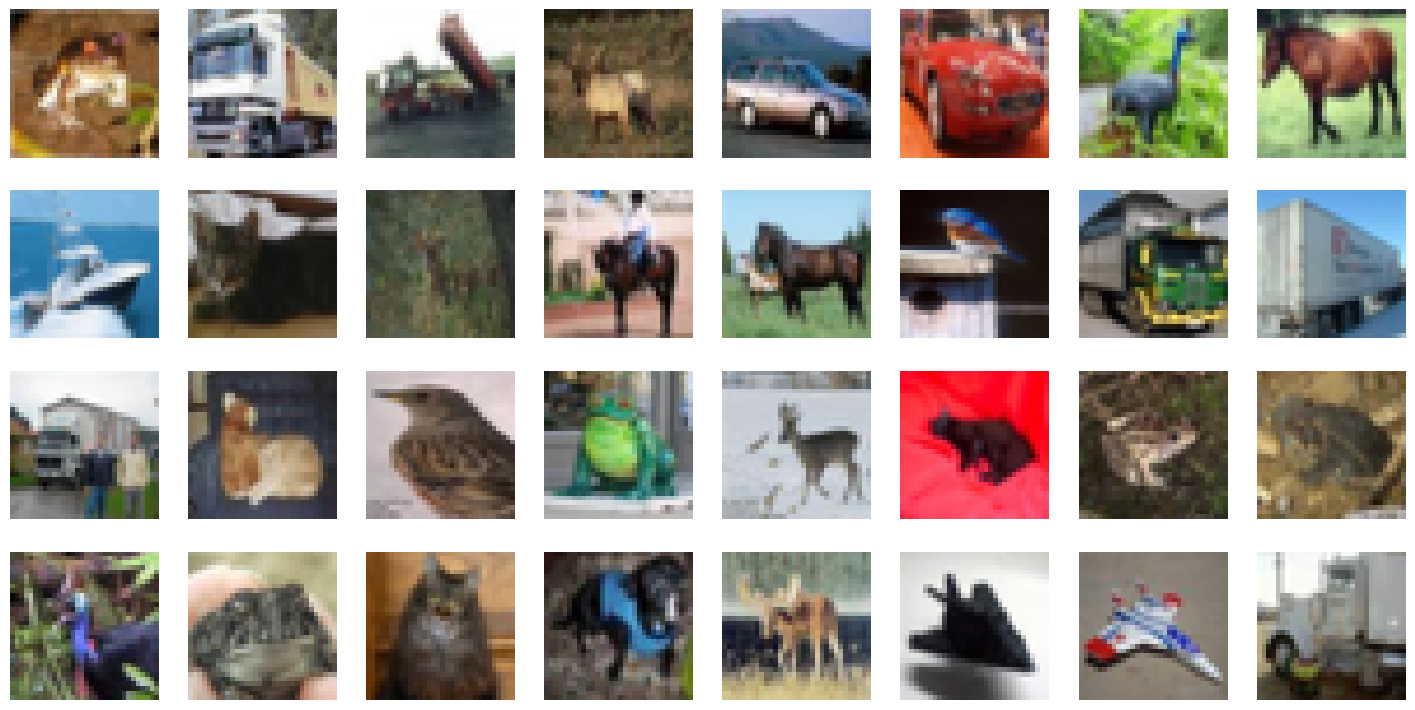

In [7]:
plt.figure(figsize=(18, 9))
 
num_rows = 4
num_cols = 8
 
# plot each of the images in the batch and the associated ground truth labels.
for i in range(num_rows*num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i,:,:])
    plt.axis("off")

# Dataset Preprocessing:

In [8]:
# Normalize images to the range [0, 1].
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32") / 255
 
# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])
 
# Convert labels to one-hot encoding.
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
 
print('After conversion to categorical one-hot encoded labels: ', y_train[0])

Original (integer) label for the first training sample:  [6]
After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Dataset and Training Configuration Parameters:

In [9]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES:  int = 10
    IMG_HEIGHT:   int = 32
    IMG_WIDTH:    int = 32
    NUM_CHANNELS: int = 3
     
@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 31
    BATCH_SIZE:    int = 256
    LEARNING_RATE: float = 0.001

# Define the Convolutional Blocks for the CNN:

In [10]:
def cnn_model(input_shape=(32, 32, 3)):
     
    model = Sequential()
     
    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
 
    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
 
    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
     
    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))
     
    return model

# Create the Model:

In [11]:
# Create the model.
model = cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

# Cmpile the Model:

In [12]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'],
             )


# Train the Model:

In [13]:
history = model.fit(X_train,
                    y_train,
                    batch_size=TrainingConfig.BATCH_SIZE, 
                    epochs=TrainingConfig.EPOCHS, 
                    verbose=1, 
                    validation_split=.3,
                   )


Epoch 1/31
137/137 [==============================] - 67s 484ms/step - loss: 2.1199 - accuracy: 0.2274 - val_loss: 1.9531 - val_accuracy: 0.3261
Epoch 2/31
137/137 [==============================] - 66s 480ms/step - loss: 1.6751 - accuracy: 0.3939 - val_loss: 1.4807 - val_accuracy: 0.4739
Epoch 3/31
137/137 [==============================] - 72s 527ms/step - loss: 1.4311 - accuracy: 0.4795 - val_loss: 1.3896 - val_accuracy: 0.4884
Epoch 4/31
137/137 [==============================] - 74s 540ms/step - loss: 1.2583 - accuracy: 0.5503 - val_loss: 1.1507 - val_accuracy: 0.5893
Epoch 5/31
137/137 [==============================] - 73s 530ms/step - loss: 1.1187 - accuracy: 0.6016 - val_loss: 1.1463 - val_accuracy: 0.5935
Epoch 6/31
137/137 [==============================] - 72s 523ms/step - loss: 0.9941 - accuracy: 0.6471 - val_loss: 1.0306 - val_accuracy: 0.6374
Epoch 7/31
137/137 [==============================] - 68s 495ms/step - loss: 0.8835 - accuracy: 0.6877 - val_loss: 0.9351 - val_ac

# Plot the Training Results:

In [14]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
     
    fig, ax = plt.subplots(figsize=(15, 4))
 
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
         
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
     
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

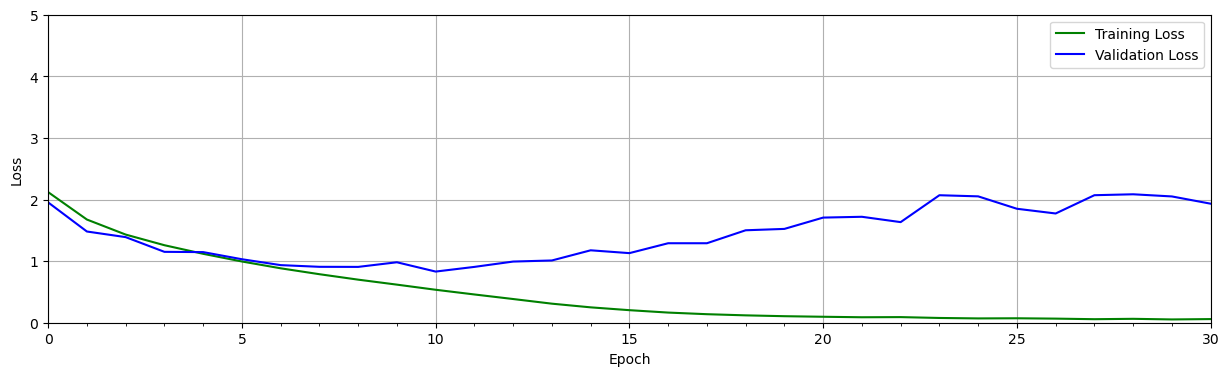

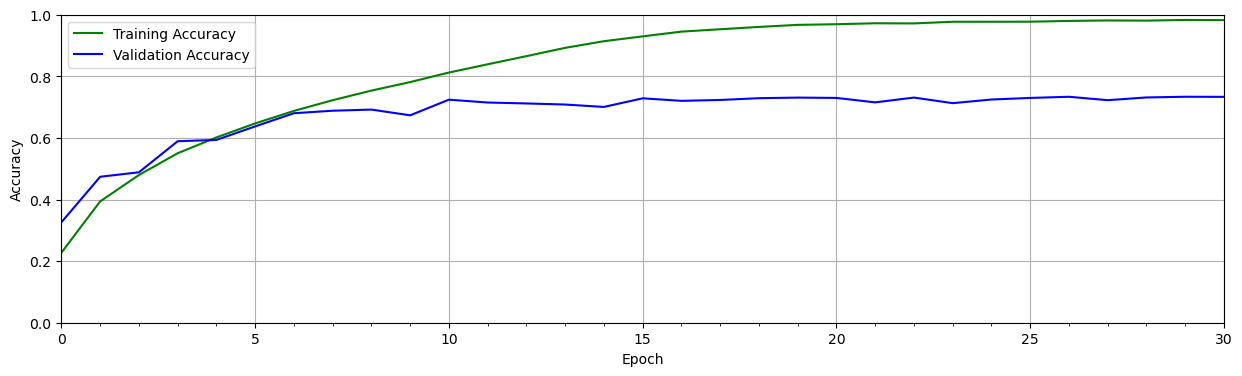

In [15]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]
   
plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);
 
plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

# Define the Model (with Dropout):

In [16]:
def cnn_model_dropout(input_shape=(32, 32, 3)):
     
    model = Sequential()
     
    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
     
    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model


# Create the Model (with Dropout):

In [17]:
# Create the model.
model_dropout = cnn_model_dropout()
model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

# Compile the Model (with Dropout):

In [18]:
model_dropout.compile(optimizer='rmsprop', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'],
                     )

# Train the Model (with Dropout):

In [19]:
history = model_dropout.fit(X_train,
                            y_train,
                            batch_size=TrainingConfig.BATCH_SIZE, 
                            epochs=TrainingConfig.EPOCHS, 
                            verbose=1, 
                            validation_split=.3,
                           )

Epoch 1/31
137/137 [==============================] - 71s 517ms/step - loss: 2.0911 - accuracy: 0.2325 - val_loss: 1.9455 - val_accuracy: 0.3029
Epoch 2/31
137/137 [==============================] - 74s 543ms/step - loss: 1.7388 - accuracy: 0.3705 - val_loss: 1.5692 - val_accuracy: 0.4285
Epoch 3/31
137/137 [==============================] - 77s 566ms/step - loss: 1.5413 - accuracy: 0.4431 - val_loss: 1.3211 - val_accuracy: 0.5172
Epoch 4/31
137/137 [==============================] - 76s 554ms/step - loss: 1.3969 - accuracy: 0.5001 - val_loss: 1.3093 - val_accuracy: 0.5204
Epoch 5/31
137/137 [==============================] - 69s 505ms/step - loss: 1.2810 - accuracy: 0.5425 - val_loss: 1.2271 - val_accuracy: 0.5535
Epoch 6/31
137/137 [==============================] - 69s 504ms/step - loss: 1.1884 - accuracy: 0.5756 - val_loss: 1.0909 - val_accuracy: 0.6071
Epoch 7/31
137/137 [==============================] - 68s 498ms/step - loss: 1.0993 - accuracy: 0.6091 - val_loss: 1.0144 - val_ac

# Plot the Training Results:

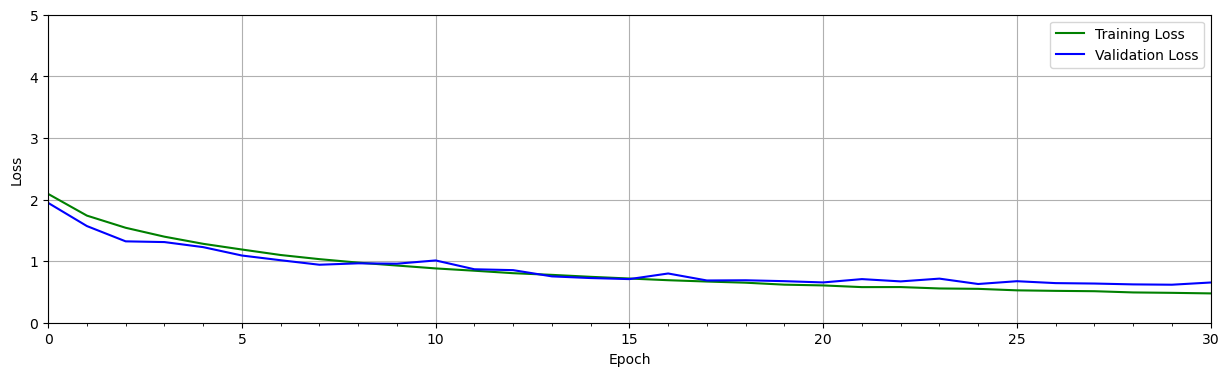

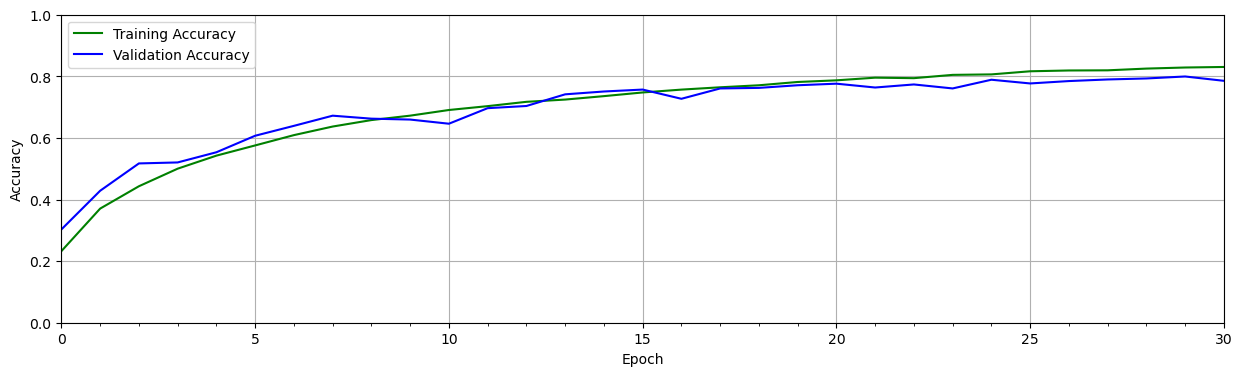

In [20]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]
     
plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);
 
plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

# Saving and Loading Models:

In [21]:
# Using the save() method, the model will be saved to the file system in the 'SavedModel' format.
model_dropout.save('model_dropout')

INFO:tensorflow:Assets written to: model_dropout/assets


INFO:tensorflow:Assets written to: model_dropout/assets


# Loading Models:

In [22]:
from tensorflow.keras import models
reloaded_model_dropout = models.load_model('model_dropout')

# Evaluate the Model on the Test Dataset :

In [23]:
test_loss, test_acc = reloaded_model_dropout.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 [==============================] - 6s 20ms/step - loss: 0.6837 - accuracy: 0.7739
Test accuracy: 77.390


# Make Predictions on Sample Test Images:

In [24]:
def evaluate_model(dataset, model):
 
    class_names = ['airplane',
                   'automobile',
                   'bird',
                   'cat',
                   'deer',
                   'dog',
                   'frog',
                   'horse',
                   'ship',
                   'truck' ]
    num_rows = 3
    num_cols = 6
     
    # Retrieve a number of images from the dataset.
    data_batch = dataset[0:num_rows*num_cols]
 
    # Get predictions from model.  
    predictions = model.predict(data_batch)
    plt.figure(figsize=(20, 8))
    num_matches = 0
         
    for idx in range(num_rows*num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])
        
        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])
             
        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={'fontsize':13})
             
        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color='g')
        else:
            plt.setp(title_obj, color='r')
            acc = num_matches/(idx+1)
    print("Prediction accuracy: ", int(100*acc)/100)
     
    return

1/1 [==============================] - 0s 77ms/step
Prediction accuracy:  0.87


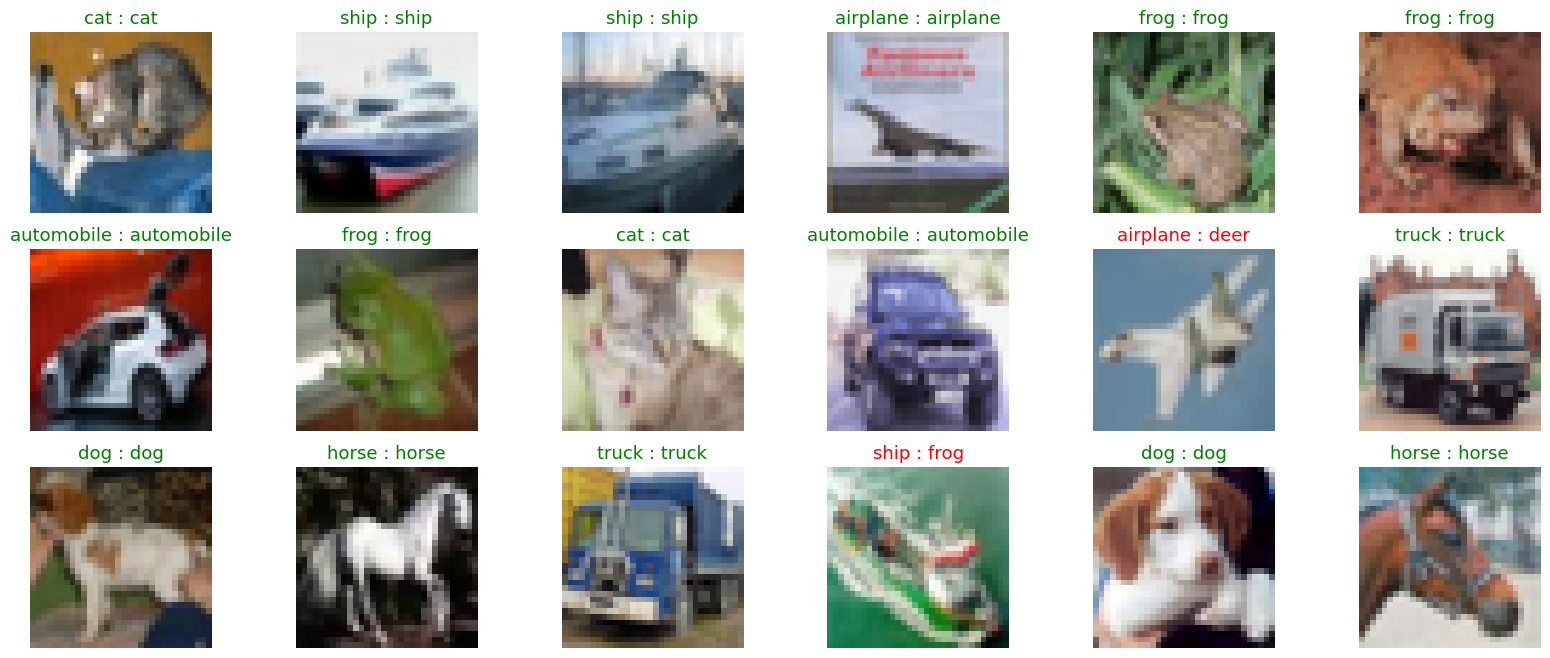

In [25]:
evaluate_model(X_test, reloaded_model_dropout)